In [1]:
import pandas as pd
import numpy as np

In [2]:
TRAIN_FILE = './dataset/logins.json'

In [3]:
df_train = pd.read_json(TRAIN_FILE)
print(df_train.head())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Aggregate these login counts based on 15minute time intervals

In [5]:
df_train.set_index('login_time', inplace=True)
df_train['count'] = 1
df_train.sort_index(inplace=True)
df_train = df_train.resample('15T').count()
df_train.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df_train.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


## Visualize and describe the resulting time series of login counts

In [7]:
df_train.plot()

Draw a weekly moving average.

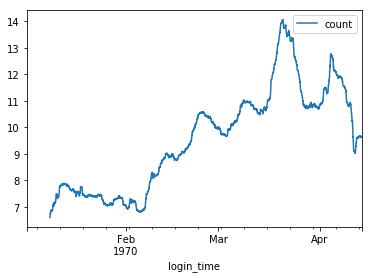

In [8]:
df_train.rolling(window=24*4*7).mean().plot()

The number of uses has increased overall.

Aggregate by day of the week and time of day.

In [9]:
df_train['day_name'] = df_train.index.map(lambda x:x.day_name())
df_train['dayofweek'] = df_train.index.map(lambda x:x.dayofweek)
df_train['hour'] = df_train.index.map(lambda x:x.hour)

In [10]:
df_train.head()

,count,day_name,dayofweek,hour
login_time,,,,
1970-01-01 20:00:00,2,Thursday,3,20
1970-01-01 20:15:00,6,Thursday,3,20
1970-01-01 20:30:00,9,Thursday,3,20
1970-01-01 20:45:00,7,Thursday,3,20
1970-01-01 21:00:00,1,Thursday,3,21


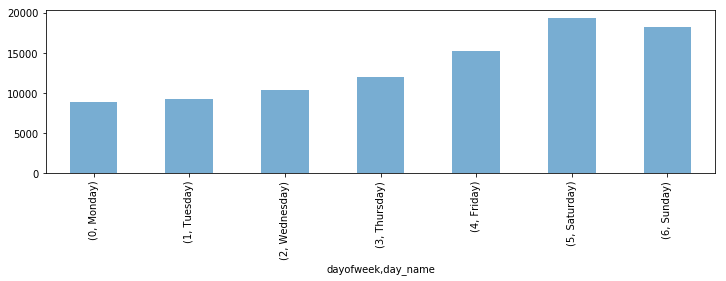

In [11]:
df_dayofweek = df_train.groupby(["dayofweek", "day_name"])['count'].sum()
df_dayofweek.plot.bar(x='day_name', y='count', alpha=0.6, figsize=(12,3))

The number of Mondays is the smallest, increasing gradually and peaking on Saturday. There are relatively many weekends.

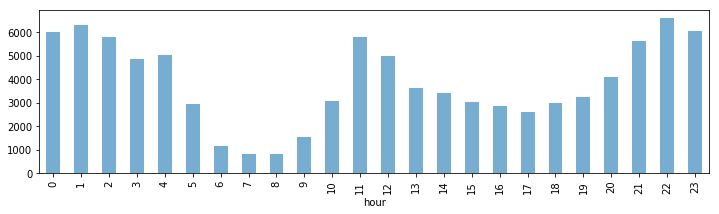

In [12]:
df_hour = df_train.groupby(["hour"])['count'].sum()
df_hour.plot.bar(x='hour', y='count', alpha=0.6, figsize=(12,3))

The number of midnights is largest and the next is around noon. The number from 7am to 8am is the smallest.